<h2><b>Predicting Next word/Sentence using LSTM</b></h2>
In this assignment, I try to add some comments to explain each and every line of code. We also have other methods to perform this task like RNN or transformers, but i perfer lstm, no doubht they take some time on training but they give us some batter results and complete our requirement specifically for this problem.

<img src="https://miro.medium.com/max/1400/1*7cMfenu76BZCzdKWCfBABA.png" alt="LSTM" width="350" height="300">

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
# Include req libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt
import numpy as np
import random
import sys

In [ ]:
# Read and open the file from G-drive
filename = "/content/drive/MyDrive/Predict_Next_Word/236-0.txt"
text = open(filename, 'r').read()

# Convert all character to lower case, it will help to train model more effectively
text = text.lower()

In [ ]:
# Add spaces where we have digits in text
text = ''.join(c for c in text if not c.isdigit())

# Get all distict character from text for labeling
chars = sorted(list(set(text)))

# give numeric value to all distict char
char_to_int = dict((c, i) for i, c in enumerate(chars))

# We need to reverse incase we want to predict char from int
int_to_char = dict((i, c) for i, c in enumerate(chars))

# summarize the data
n_chars = len(text)
n_vocab = len(chars)
print("Total Characters in the text: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters in the text:  292870
Total Vocab:  51


In [ ]:
# Now it's time to squence out our data. we define some values and pass it in our loop
seq_length = 60  
step = 10   
sentences = [] 
next_chars = []

# so here we are passing sentences having 60 char with coorespond one char
# And we jump our loop to 10 step forward in our seq
for i in range(0, n_chars - seq_length, step): 
  sentences.append(text[i: i + seq_length])  
  next_chars.append(text[i + seq_length]) 
  n_patterns = len(sentences)   

print('Number of sequences:', n_patterns)

Number of sequences: 29281


In [ ]:
# So till now we have data in char or in list so we need to perform vectorization and pass bool data to our model
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1
    
print(x.shape)
print(y.shape)

<ipython-input-6-62bb982cf9bf>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
<ipython-input-6-62bb982cf9bf>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), n_vocab), dtype=np.bool)


(29281, 60, 51)
(29281, 51)


In [ ]:
# Here we have sequential model with lstm and dense layers
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
#model.add(Dropout(0.2))
#model.add(LSTM(128))
#model.add(Dropout(0.2))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               92160     
                                                                 
 dense_2 (Dense)             (None, 51)                6579      
                                                                 
Total params: 98,739
Trainable params: 98,739
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# In order to save model and weights, as long as our model is improving
from keras.callbacks import ModelCheckpoint

filepath="/content/drive/MyDrive/Predict_Next_Word/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

In [ ]:
history = model.fit(x, y,
          batch_size=128,
          epochs=50,   
          callbacks=callbacks_list)

Epoch 1/50
229/229 [==============================] - ETA: 0s - loss: 2.5240
Epoch 1: loss improved from inf to 2.52401, saving model to /content/drive/MyDrive/Predict_Next_Word/saved_weights-01-2.5240.hdf5
229/229 [==============================] - 27s 110ms/step - loss: 2.5240
Epoch 2/50
229/229 [==============================] - ETA: 0s - loss: 2.0580
Epoch 2: loss improved from 2.52401 to 2.05801, saving model to /content/drive/MyDrive/Predict_Next_Word/saved_weights-02-2.0580.hdf5
229/229 [==============================] - 25s 110ms/step - loss: 2.0580
Epoch 3/50
229/229 [==============================] - ETA: 0s - loss: 1.8674
Epoch 3: loss improved from 2.05801 to 1.86737, saving model to /content/drive/MyDrive/Predict_Next_Word/saved_weights-03-1.8674.hdf5
229/229 [==============================] - 25s 110ms/step - loss: 1.8674
Epoch 4/50
229/229 [==============================] - ETA: 0s - loss: 1.7376
Epoch 4: loss improved from 1.86737 to 1.73755, saving model to /content/dr

In [ ]:
# Save and load the model
filename = "/content/drive/MyDrive/Predict_Next_Word/Forcaste/my_saved_weights_50epochs.h5"
model.save(filename)
model.load_weights(filename)

<b>Result & Evaluation</b>

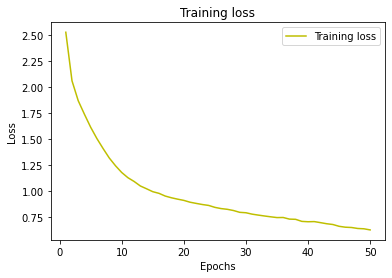

In [ ]:
#plot the training loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Write the function which get most probably char out of 51 
def most_probable_char(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)

In [ ]:
# Pick a random sentence from the text.
generated = ''
start_index = random.randint(0, n_chars - seq_length - 1)
sentence = text[start_index: start_index + seq_length]
generated += sentence

print('Text for our prediction: "' + sentence + '"')

Text for our prediction: "stupid tuft of feathers!” said rikki-tikki angrily. “is this"


In [ ]:
#Loop for next 20 char including spaces
for i in range(20):  
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = most_probable_char(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

print(generated)

stupid tuft of feathers!” said rikki-tikki angrily. “is this shoulders it a been


!!! END